# Breast Cancer Explatory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [2]:
cancer = pd.read_csv(r"C:\Users\oguzh\Desktop\scrawl\breast cancer EDA\cancer.csv")
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [3]:
#prepare X and y
X = cancer.drop(["id", "Unnamed: 32", "diagnosis"], axis=1)
y = [1 if x == "M" else 0 for x in cancer.diagnosis]

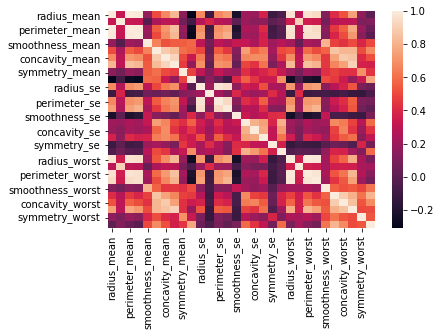

In [4]:
#find correlation 
sns.heatmap(X.corr())
plt.show()

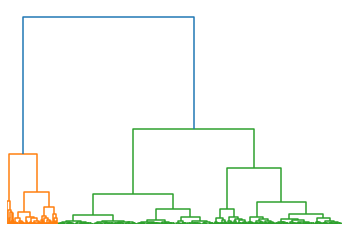

In [5]:
#draw dendrogram to determine optimal cluster number(optimal cluster = 2)
merg = linkage(X, method="ward")
dendrogram(merg)
plt.axis("off")
plt.show()

In [6]:
kmeans_cluster = KMeans(n_clusters=2)
kmeans_cluster.fit_predict(X)
X["label"] = kmeans_cluster.labels_

#check accuracy for labelling process
counter = 0
for index, v in enumerate(X.label):
    if v == y[index]:
        counter += 1
print("labelling accuracy : {}\n".format(counter / len(y)))

#compare original label and generated label
fig1 = px.scatter_3d(X, x="area_worst", y="texture_worst", z="texture_mean", color="label")
fig2 = px.scatter_3d(cancer, x="area_worst", y="texture_worst", z="texture_mean", color="diagnosis")
fig1.show()
fig2.show()


labelling accuracy : 0.8541300527240774



accuracy score : 0.9649122807017544



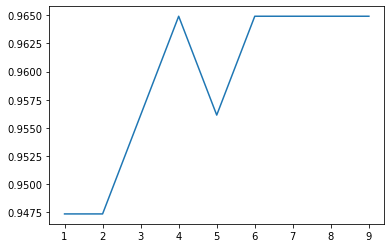

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

#find best k value for KNN model(k = 4)
wcss = []
for _i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=_i)
    knn.fit(X_train, y_train)
    wcss.append(knn.score(X_test, y_test))

plt.plot(range(1, 10), wcss)

#create model to predict malignant or benign
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)
print("accuracy score : {}\n".format(knn_classifier.score(X_test, y_test)))


